In [75]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
import random

from PIL import Image

In [76]:
lr = 0.001
batch_size = 10
epochs = 10

In [77]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)

print(device)

cpu


Task 1-2

In [78]:
train_path='C:/Repository/lab/train'
test_path='C:/Repository/lab/test'
val_path='C:/Repository/lab/val'


df = pd.read_csv('paths.csv', sep = ',', header=None)


df.drop(1, axis=1, inplace=True)
df.rename(columns={0: 'absolute_way', 2: 'class_img'}, inplace=True)
df.reset_index(inplace=True)
print(df)


if not os.path.isdir(train_path):
    os.mkdir(train_path)

if not os.path.isdir(test_path):
    os.mkdir(test_path)

if not os.path.isdir(val_path):
    os.mkdir(val_path)

def load_train(df: pd.core.frame.DataFrame, path: str, i: int) -> None:    
    '''
    Загружает i-ую картинку из датафрейма по заданному пути path
    Parameters
        df(pd.core.frame.DataFrame): 
         датафрейм с картинками 
        path(str): 
         путь загрузки картинок
        i(int): 
         номер картинки 
    '''
    image_path = df.absolute_way[i]
    image = cv2.imread(image_path)
    cv2.imwrite(os.path.join(path, f'{df.class_img[i]}.{i}.jpg'), image)

def load_val(df: pd.core.frame.DataFrame, path: str, i: int) -> None:
    '''
    Загружает i-ую картинку из датафрейма по заданному пути path
    Parameters
        df(pd.core.frame.DataFrame): 
         датафрейм с картинками 
        path(str): 
         путь загрузки картинок
        i(int): 
         номер картинки 
    '''
    image_path = df.absolute_way[i]
    image = cv2.imread(image_path)
    cv2.imwrite(os.path.join(path, f'{i}.jpg'), image)

def load_test(df: pd.core.frame.DataFrame, path: str, i: int) -> None:
    '''
    Загружает i-ую картинку из датафрейма по заданному пути path
    Parameters
        df(pd.core.frame.DataFrame): 
         датафрейм с картинками 
        path(str): 
         путь загрузки картинок
        i(int): 
         номер картинки 
    '''
    image_path = df.absolute_way[i]
    image = cv2.imread(image_path)
    cv2.imwrite(os.path.join(path, f'{i}.jpg'), image)


for i in range(800):
    load_train(df, train_path, i)
for i in range(1000,1800):
    load_train(df, train_path, i)
for i in range(800,900):
    load_test(df,test_path,i)
for i in range(1800,1900):
    load_test(df,test_path,i)
for i in range(900,1000):
    load_val(df,val_path,i)
for i in range(1900,1999):
    load_val(df,val_path,i)

train_list = glob.glob(os.path.join(train_path,'*.jpg'))
test_list = glob.glob(os.path.join(test_path, '*.jpg'))

train_list, val_list = train_test_split(train_list, test_size=0.1)

      index                            absolute_way class_img
0         0  C:\Repository\lab\dataset\cat\0000.jpg       cat
1         1  C:\Repository\lab\dataset\cat\0001.jpg       cat
2         2  C:\Repository\lab\dataset\cat\0002.jpg       cat
3         3  C:\Repository\lab\dataset\cat\0003.jpg       cat
4         4  C:\Repository\lab\dataset\cat\0004.jpg       cat
...     ...                                     ...       ...
1995   1995  C:\Repository\lab\dataset\dog\0995.jpg       dog
1996   1996  C:\Repository\lab\dataset\dog\0996.jpg       dog
1997   1997  C:\Repository\lab\dataset\dog\0997.jpg       dog
1998   1998  C:\Repository\lab\dataset\dog\0998.jpg       dog
1999   1999  C:\Repository\lab\dataset\dog\0999.jpg       dog

[2000 rows x 3 columns]


Check out datasets

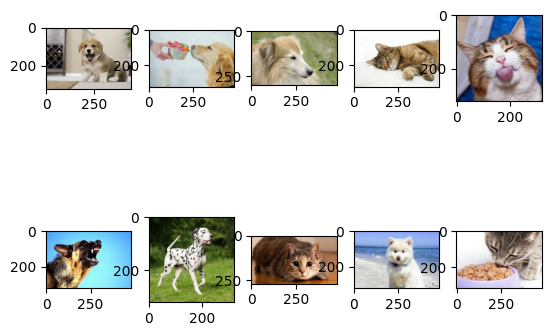

In [79]:
random_idx = np.random.randint(1,200,size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = cv2.imread(train_list[idx])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    i+=1

plt.show()

Task 4

Class dataset,which will store uploaded and converted images and class labels: 0-cat, 1-dog

In [132]:

class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('\\')[-1].split('.')[0]
        if label == 'dog':
            label=1
        elif label == 'cat':
            label=0
            
        return img_transformed,label

In [134]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

test_transforms = transforms.Compose([   
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

In [135]:
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [229]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.8824, 0.8353, 0.7922,  ..., 0.9725, 0.9725, 0.9725],
         [0.8706, 0.8235, 0.7725,  ..., 0.9725, 0.9725, 0.9725],
         [0.8510, 0.8078, 0.7529,  ..., 0.9725, 0.9725, 0.9725],
         ...,
         [0.5922, 0.5922, 0.5882,  ..., 0.9686, 0.9686, 0.9686],
         [0.5922, 0.5843, 0.5765,  ..., 0.9647, 0.9647, 0.9647],
         [0.5882, 0.5765, 0.5647,  ..., 0.9569, 0.9569, 0.9608]],

        [[0.8431, 0.7765, 0.7098,  ..., 0.9765, 0.9765, 0.9765],
         [0.8235, 0.7569, 0.6824,  ..., 0.9765, 0.9765, 0.9765],
         [0.7961, 0.7294, 0.6549,  ..., 0.9765, 0.9765, 0.9765],
         ...,
         [0.4118, 0.4118, 0.4039,  ..., 0.9765, 0.9765, 0.9765],
         [0.4118, 0.4078, 0.4000,  ..., 0.9686, 0.9686, 0.9686],
         [0.4157, 0.4039, 0.3922,  ..., 0.9608, 0.9608, 0.9647]],

        [[0.7373, 0.6471, 0.5569,  ..., 0.9569, 0.9569, 0.9569],
         [0.7176, 0.6275, 0.5294,  ..., 0.9569, 0.9569, 0.9569],
         [0.6902, 0.6000, 0.5020,  ..., 0.9569, 0.9569, 0

Task 3

In [169]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True)

Convolutional neural network

In [230]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [231]:
model = ConvNet().to(device)
model.train()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
 

check

In [232]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1440 144
160 16


torch.Size([3, 224, 224])

Tasks 5-6

Model training

Learning rate: 0.001, Batch size: 10
Epoch : 1, train accuracy : 0.597222089767456, train loss : 0.6669371724128723
Epoch : 1, val_accuracy : 0.53125, val_loss : 0.7171846032142639
Epoch : 2, train accuracy : 0.6215277314186096, train loss : 0.6473495364189148
Epoch : 2, val_accuracy : 0.643750011920929, val_loss : 0.6521590948104858
Epoch : 3, train accuracy : 0.6381946206092834, train loss : 0.6366502642631531
Epoch : 3, val_accuracy : 0.668749988079071, val_loss : 0.6382953524589539
Epoch : 4, train accuracy : 0.6687502264976501, train loss : 0.6149601936340332
Epoch : 4, val_accuracy : 0.65625, val_loss : 0.6121096014976501
Epoch : 5, train accuracy : 0.677083432674408, train loss : 0.605973482131958
Epoch : 5, val_accuracy : 0.668749988079071, val_loss : 0.6017548441886902
Epoch : 6, train accuracy : 0.6770836710929871, train loss : 0.592613935470581
Epoch : 6, val_accuracy : 0.7000000476837158, val_loss : 0.6103776097297668
Epoch : 7, train accuracy : 0.6819446682929993, train lo

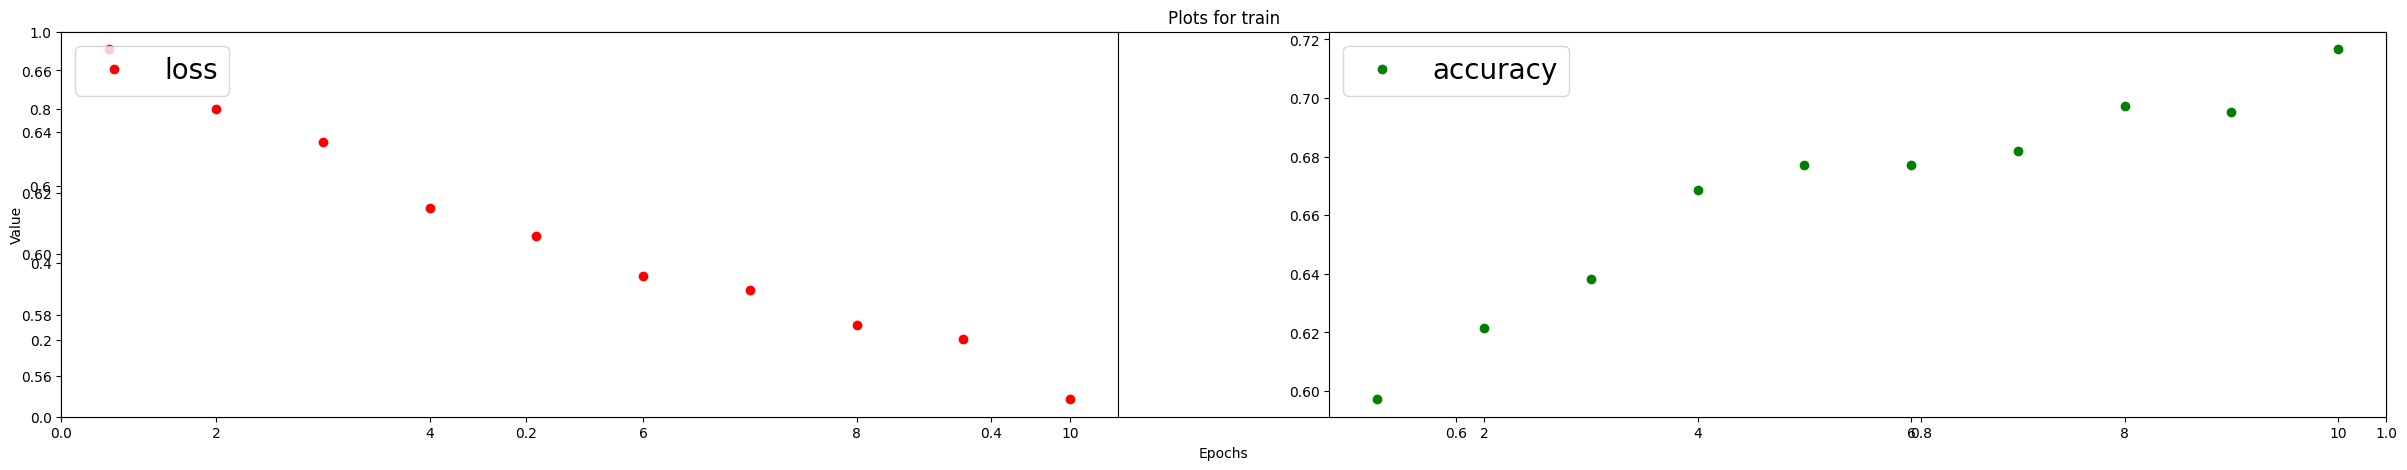

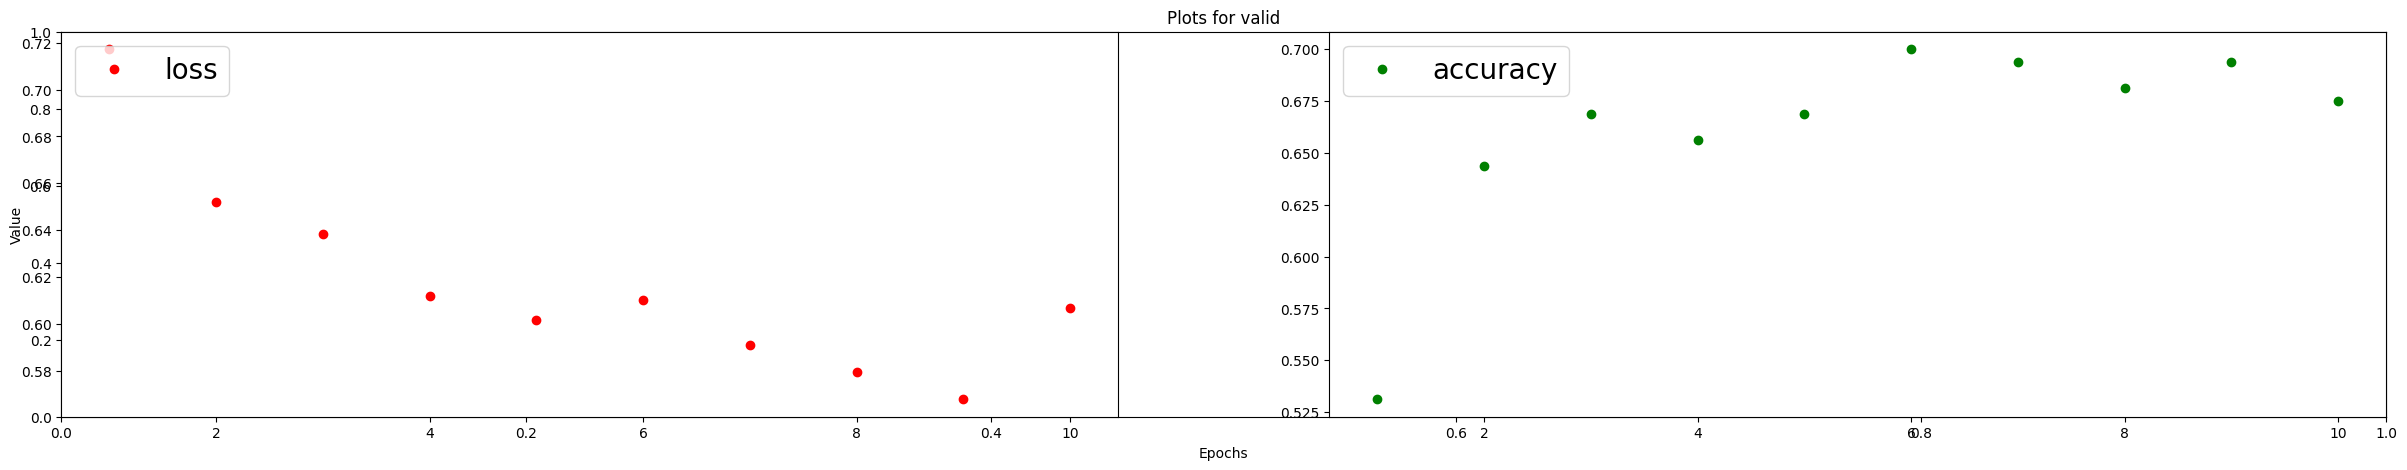

In [233]:
print('Learning rate: 0.001, Batch size: 10')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

epochs = 10
def train_loop (train_loader, val_loader, epochs):
    val_loss_list = []
    val_accuracy_list = []

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0

        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)

            output = model(data)
            loss = criterion(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)

        loss_list.append(epoch_loss.item())
        accuracy_list.append(epoch_accuracy.item())

        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


        with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0

            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)

                val_output = model(data)
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)


            val_loss_list.append(epoch_val_loss.item())
            val_accuracy_list.append(epoch_val_accuracy.item())

            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))


    num_epochs = [i+1 for i in range(epochs)]

    fig = plt.figure(figsize=(30, 5))
    plt.title('Plots for train')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, loss_list, 'ro', label = 'loss')
    plt.legend(loc=2, prop={'size': 20})
    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, accuracy_list, 'go', label = 'accuracy')
    plt.legend(loc=2, prop={'size': 20})

    fig = plt.figure(figsize=(30, 5))
    plt.title('Plots for valid')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, val_loss_list, 'ro', label = 'loss')
    plt.legend(loc=2, prop={'size': 20})
    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, val_accuracy_list, 'go', label = 'accuracy')
    plt.legend(loc=2, prop={'size': 20})

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0005, Batch size: 10
Epoch : 1, train accuracy : 0.7250000834465027, train loss : 0.527263879776001
Epoch : 1, val_accuracy : 0.71875, val_loss : 0.5525425672531128
Epoch : 2, train accuracy : 0.7458335757255554, train loss : 0.5187095999717712
Epoch : 2, val_accuracy : 0.75, val_loss : 0.4771382212638855
Epoch : 3, train accuracy : 0.7555559873580933, train loss : 0.5000625252723694
Epoch : 3, val_accuracy : 0.706250011920929, val_loss : 0.5436484813690186
Epoch : 4, train accuracy : 0.7444450259208679, train loss : 0.5083112120628357
Epoch : 4, val_accuracy : 0.7375000715255737, val_loss : 0.5249432325363159
Epoch : 5, train accuracy : 0.7388893961906433, train loss : 0.5088874101638794
Epoch : 5, val_accuracy : 0.7124999761581421, val_loss : 0.5825395584106445
Epoch : 6, train accuracy : 0.7548617124557495, train loss : 0.4990212321281433
Epoch : 6, val_accuracy : 0.7562499642372131, val_loss : 0.5378786325454712
Epoch : 7, train accuracy : 0.7548615336418152, train

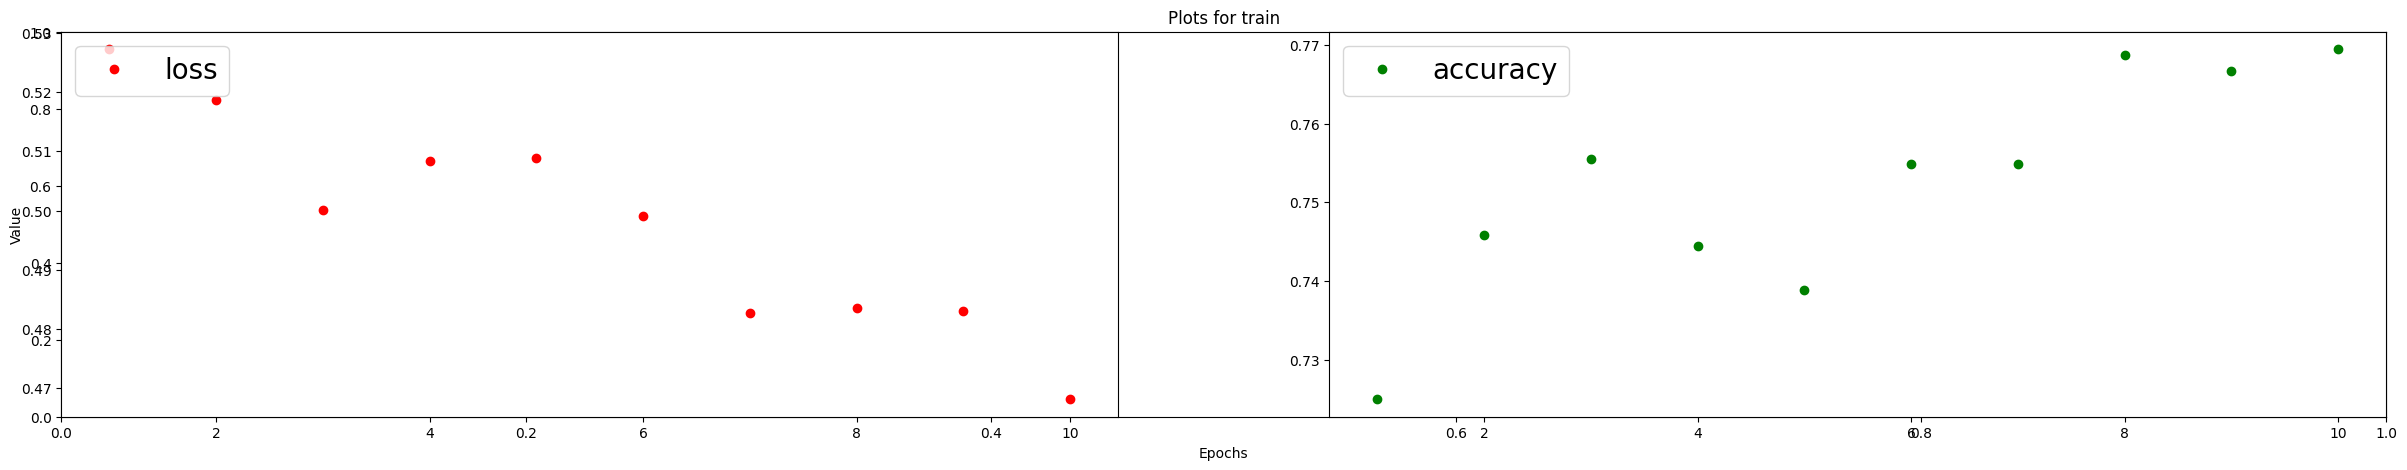

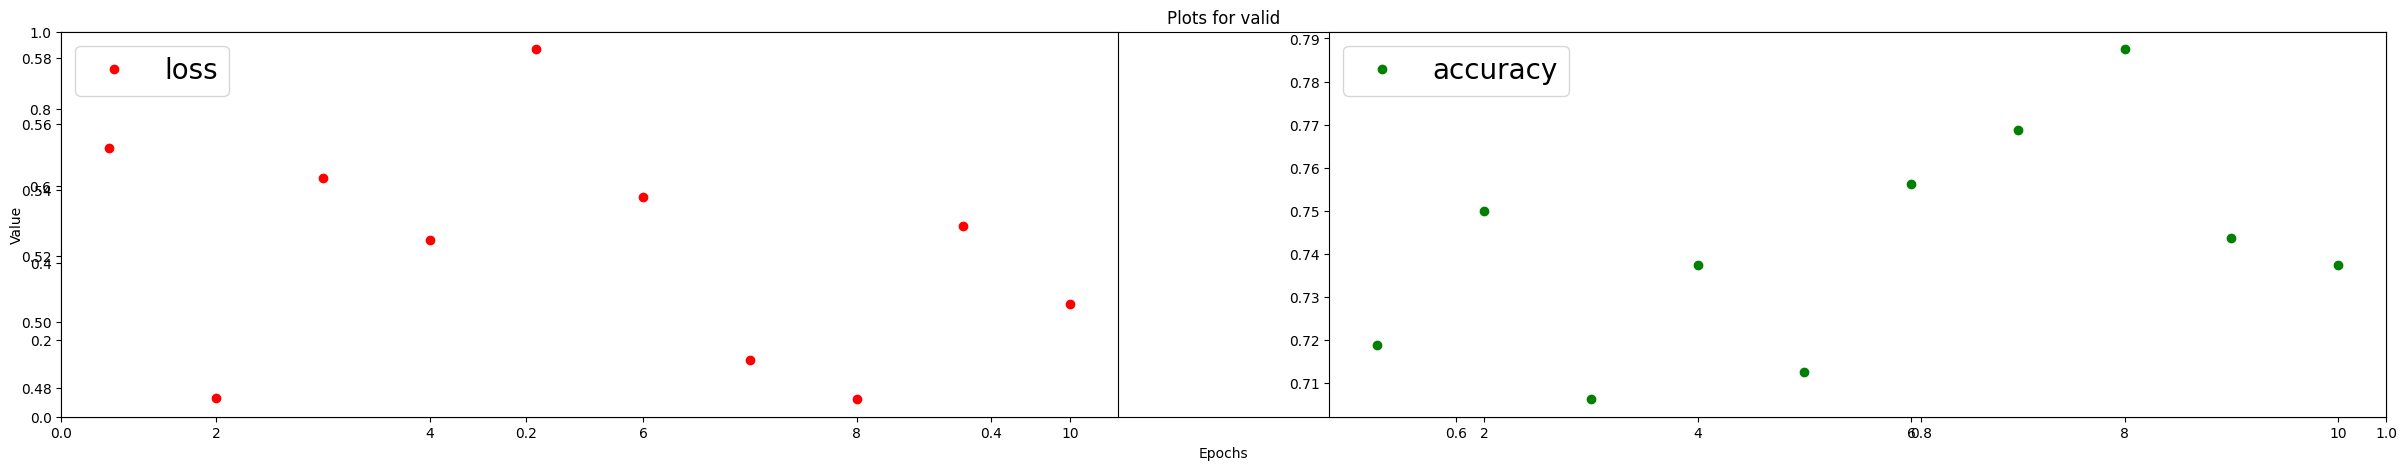

In [245]:
print('Learning rate: 0.0005, Batch size: 10')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0007, Batch size: 10
Epoch : 1, train accuracy : 0.7486114501953125, train loss : 0.5100311636924744
Epoch : 1, val_accuracy : 0.7499999403953552, val_loss : 0.5122907161712646
Epoch : 2, train accuracy : 0.7659727931022644, train loss : 0.47161051630973816
Epoch : 2, val_accuracy : 0.78125, val_loss : 0.48255228996276855
Epoch : 3, train accuracy : 0.7819448709487915, train loss : 0.4621111750602722
Epoch : 3, val_accuracy : 0.731249988079071, val_loss : 0.5447351336479187
Epoch : 4, train accuracy : 0.7923616766929626, train loss : 0.44527313113212585
Epoch : 4, val_accuracy : 0.762499988079071, val_loss : 0.49300938844680786
Epoch : 5, train accuracy : 0.7722227573394775, train loss : 0.46313390135765076
Epoch : 5, val_accuracy : 0.75, val_loss : 0.5252758860588074
Epoch : 6, train accuracy : 0.788889467716217, train loss : 0.4515862464904785
Epoch : 6, val_accuracy : 0.800000011920929, val_loss : 0.4815872013568878
Epoch : 7, train accuracy : 0.771528422832489, tra

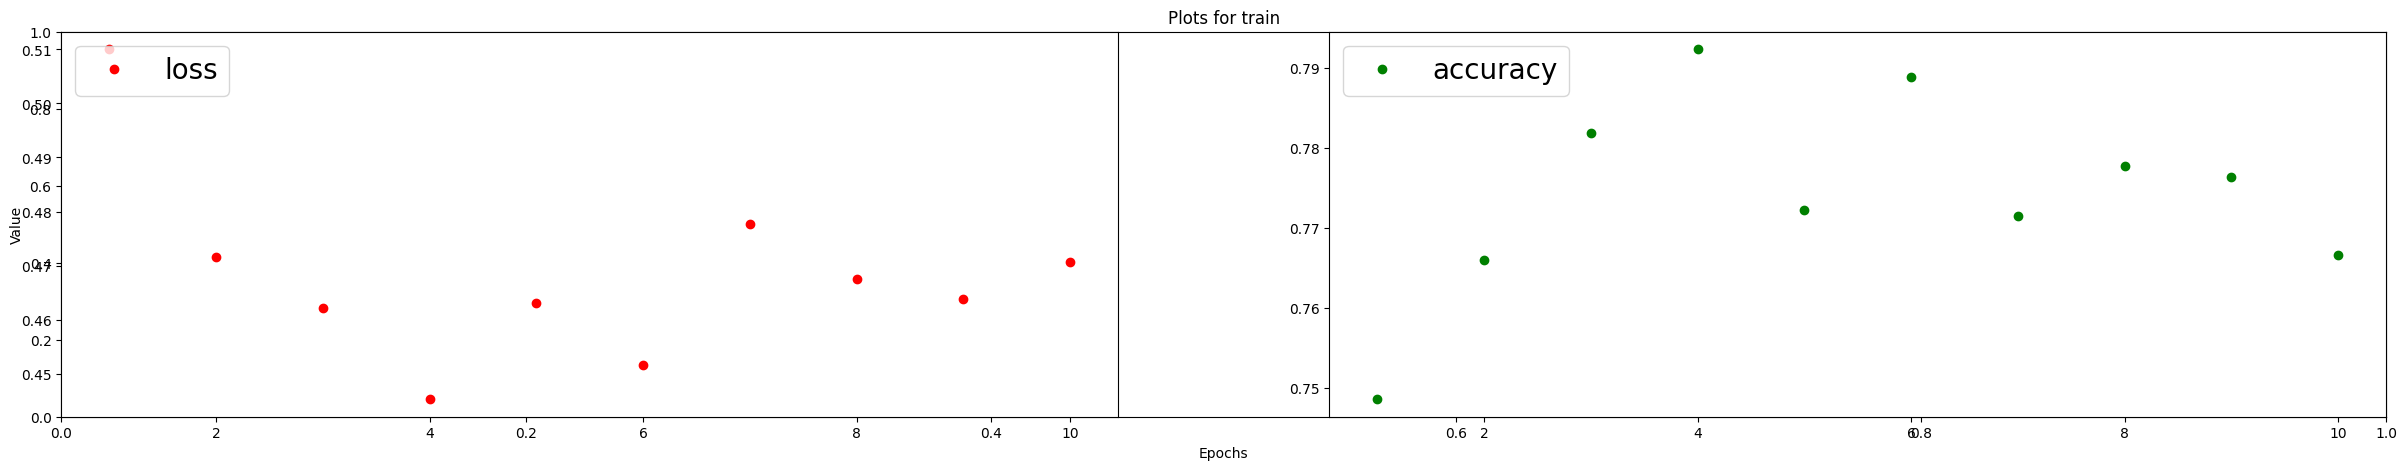

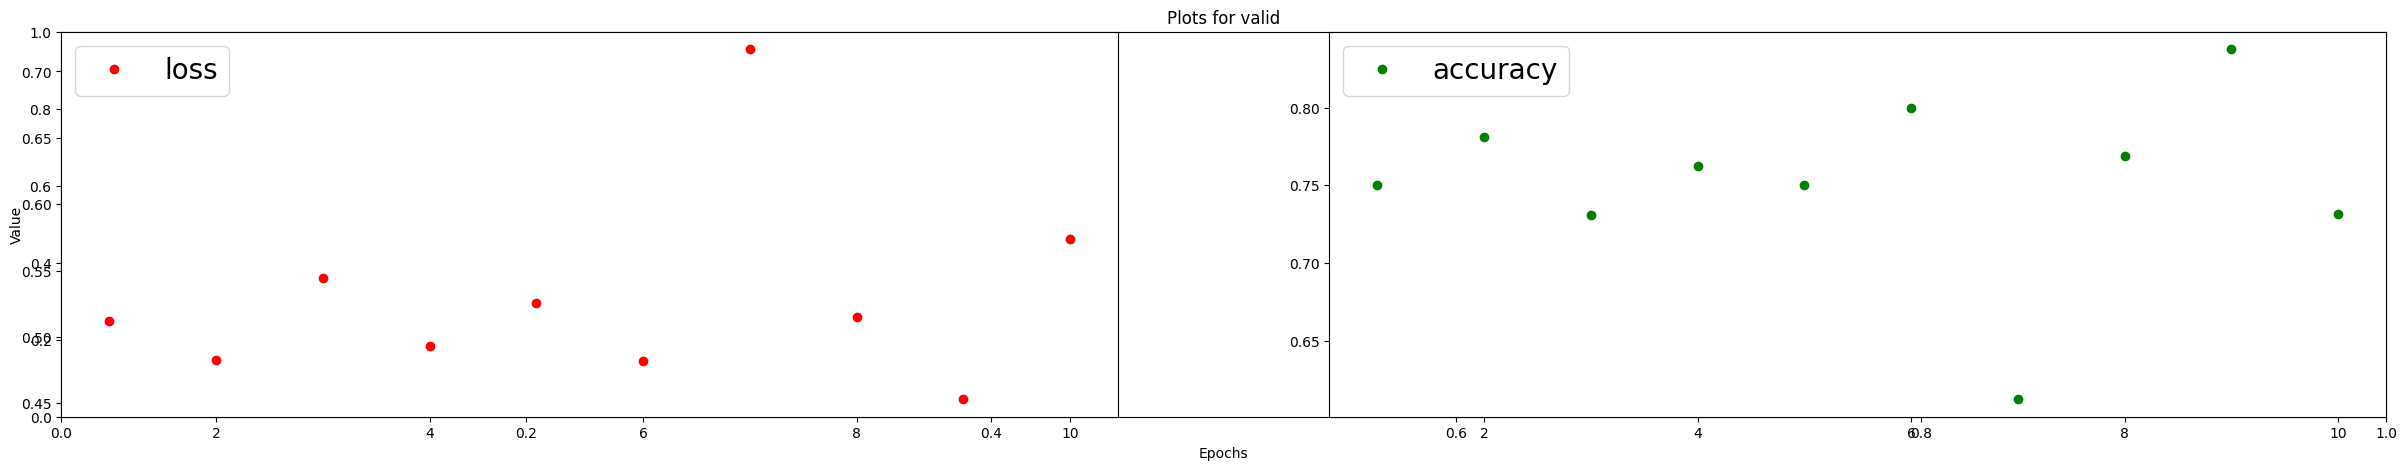

In [246]:
print('Learning rate: 0.0007, Batch size: 10')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 20
Epoch : 1, train accuracy : 0.8013889193534851, train loss : 0.4255388081073761
Epoch : 1, val_accuracy : 0.7875000238418579, val_loss : 0.4853551983833313
Epoch : 2, train accuracy : 0.7930556535720825, train loss : 0.4315231740474701
Epoch : 2, val_accuracy : 0.7937500476837158, val_loss : 0.3899383544921875
Epoch : 3, train accuracy : 0.8048614859580994, train loss : 0.4270916283130646
Epoch : 3, val_accuracy : 0.7125000357627869, val_loss : 0.5022651553153992
Epoch : 4, train accuracy : 0.7923612594604492, train loss : 0.42784765362739563
Epoch : 4, val_accuracy : 0.7749999761581421, val_loss : 0.4811248183250427
Epoch : 5, train accuracy : 0.8173611760139465, train loss : 0.40483418107032776
Epoch : 5, val_accuracy : 0.75, val_loss : 0.4749966263771057
Epoch : 6, train accuracy : 0.8027780055999756, train loss : 0.4139922559261322
Epoch : 6, val_accuracy : 0.7749999761581421, val_loss : 0.4854044020175934
Epoch : 7, train accuracy : 0.797916710

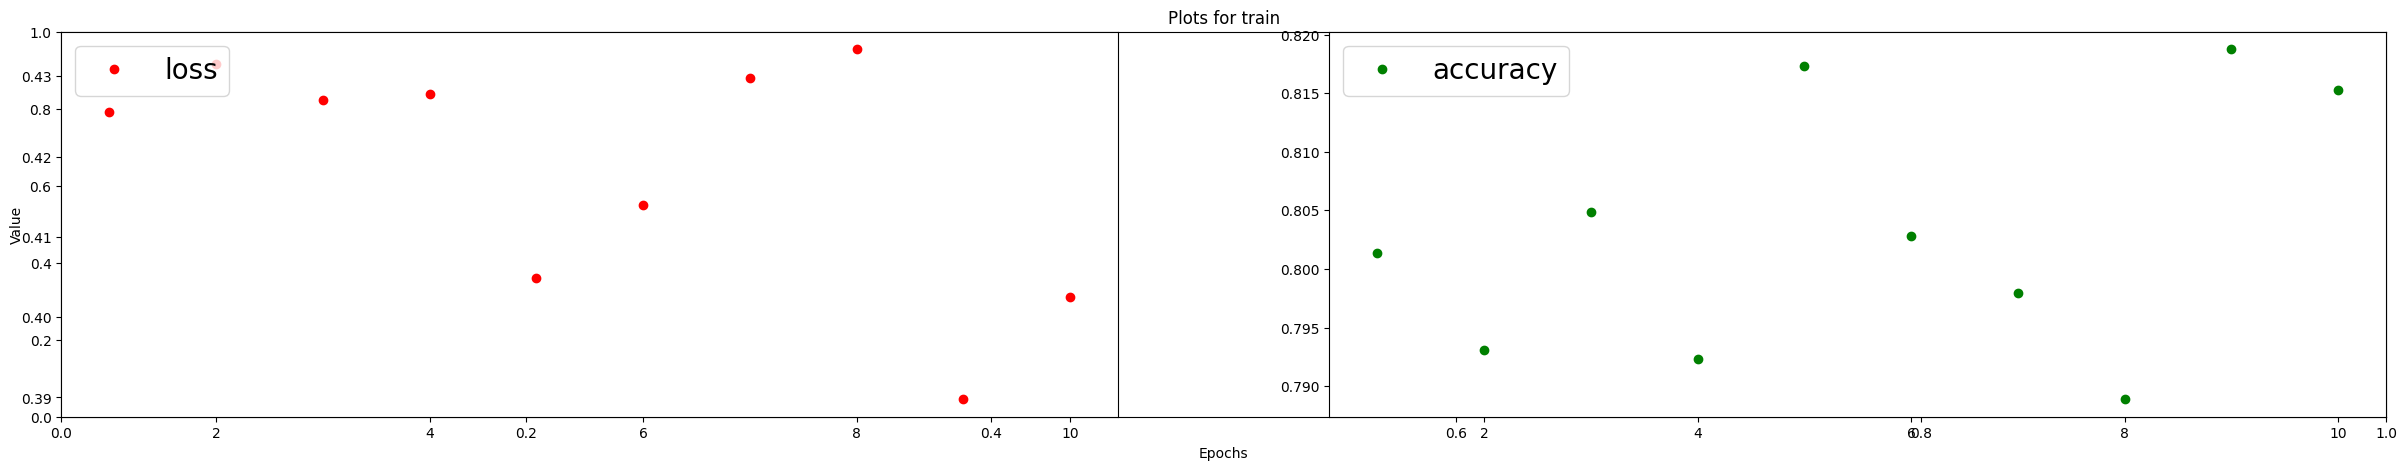

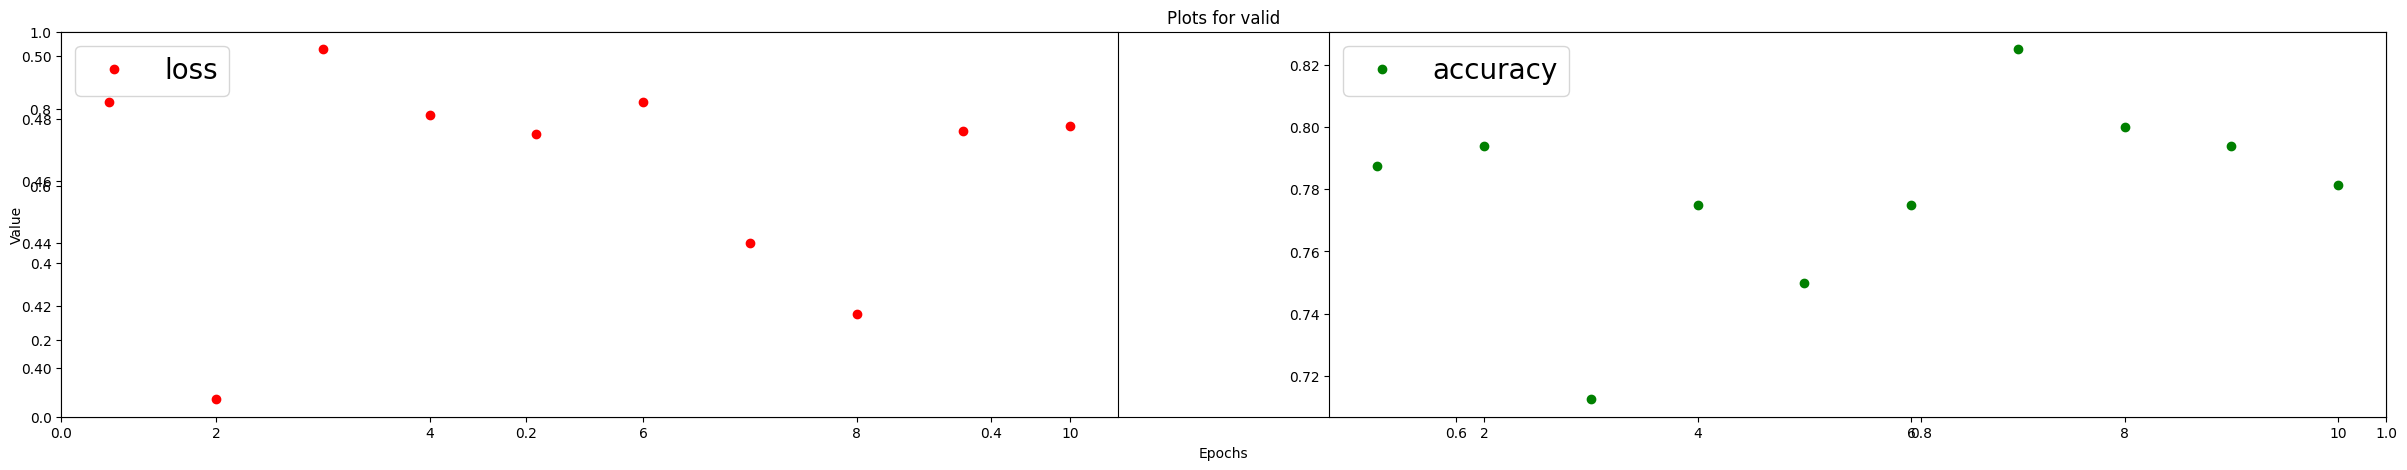

In [140]:
print('Learning rate: 0.001, Batch size: 20')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=20, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=20, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=20, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0005, Batch size: 20
Epoch : 1, train accuracy : 0.8104167580604553, train loss : 0.4037798047065735
Epoch : 1, val_accuracy : 0.7625000476837158, val_loss : 0.4511302411556244
Epoch : 2, train accuracy : 0.811805784702301, train loss : 0.384858101606369
Epoch : 2, val_accuracy : 0.7687500715255737, val_loss : 0.4970693290233612
Epoch : 3, train accuracy : 0.8298611044883728, train loss : 0.37910646200180054
Epoch : 3, val_accuracy : 0.793749988079071, val_loss : 0.4022572934627533
Epoch : 4, train accuracy : 0.8493056297302246, train loss : 0.3685013949871063
Epoch : 4, val_accuracy : 0.8062499761581421, val_loss : 0.45278051495552063
Epoch : 5, train accuracy : 0.8381944298744202, train loss : 0.3652738630771637
Epoch : 5, val_accuracy : 0.8125, val_loss : 0.463480681180954
Epoch : 6, train accuracy : 0.8319445252418518, train loss : 0.3733018636703491
Epoch : 6, val_accuracy : 0.7874999642372131, val_loss : 0.45753347873687744
Epoch : 7, train accuracy : 0.836805641

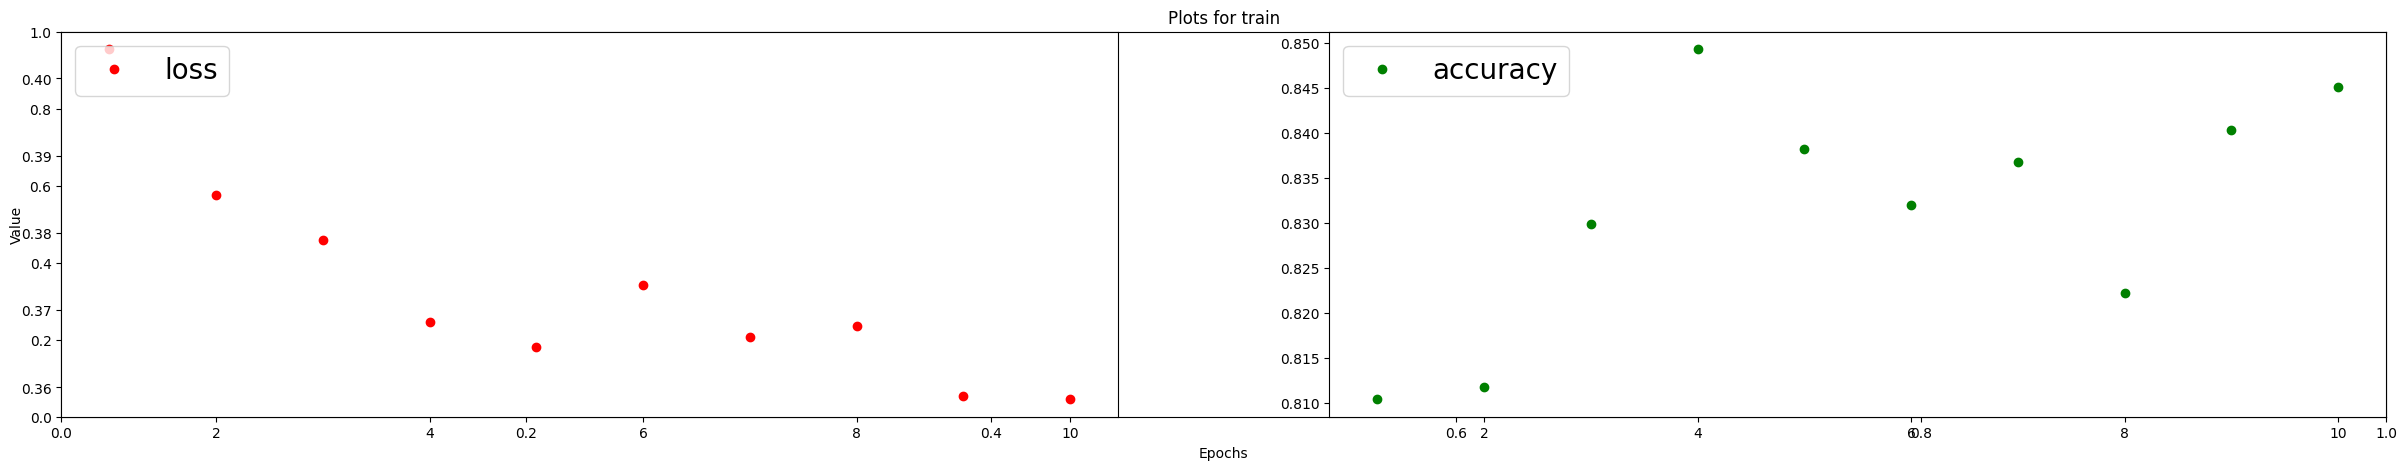

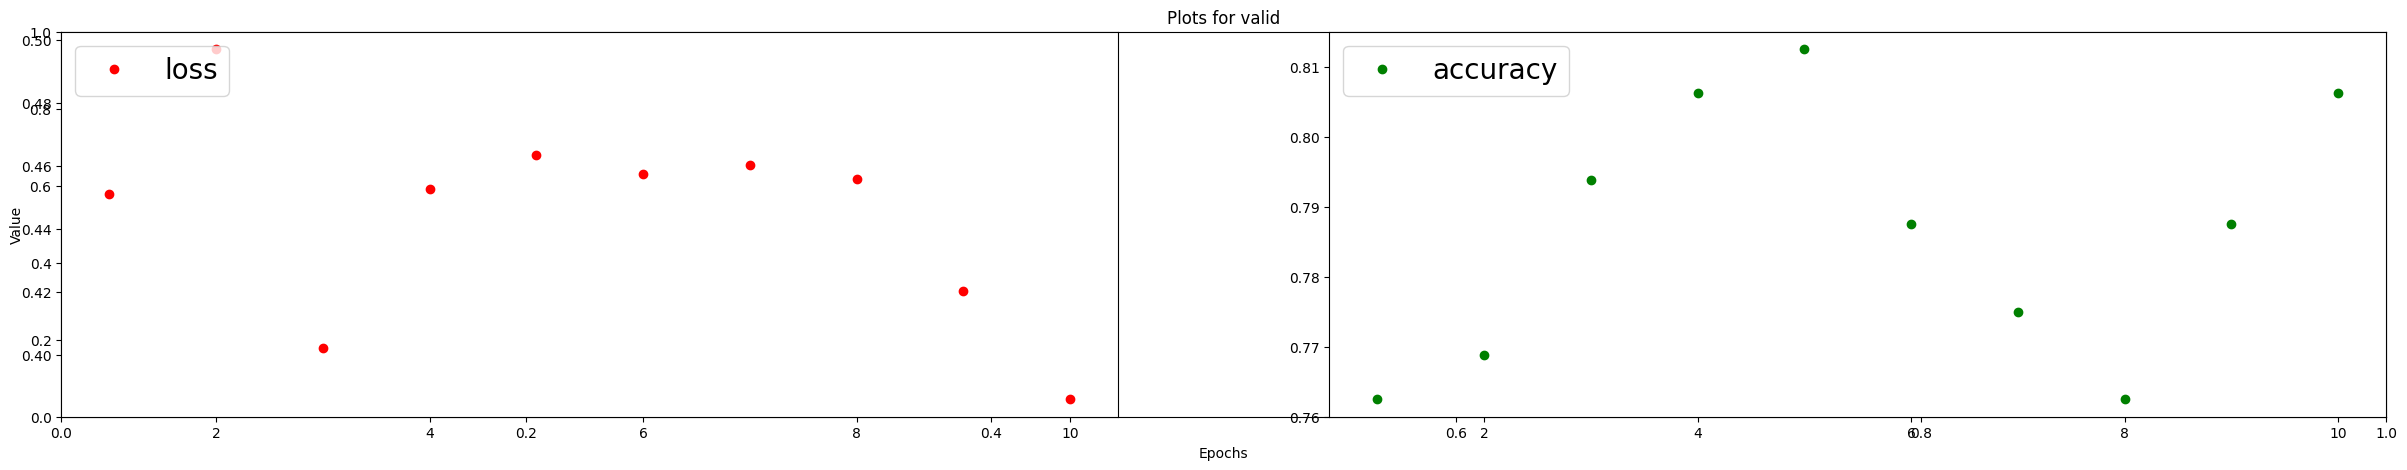

In [141]:
print('Learning rate: 0.0005, Batch size: 20')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=20, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=20, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=20, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0007, Batch size: 20
Epoch : 1, train accuracy : 0.8222222924232483, train loss : 0.3719525635242462
Epoch : 1, val_accuracy : 0.8499999642372131, val_loss : 0.39205265045166016
Epoch : 2, train accuracy : 0.8291667103767395, train loss : 0.35923564434051514
Epoch : 2, val_accuracy : 0.7874999642372131, val_loss : 0.43949612975120544
Epoch : 3, train accuracy : 0.8298612236976624, train loss : 0.36136695742607117
Epoch : 3, val_accuracy : 0.8125, val_loss : 0.45043858885765076
Epoch : 4, train accuracy : 0.8312500715255737, train loss : 0.36611703038215637
Epoch : 4, val_accuracy : 0.8749999403953552, val_loss : 0.3330335319042206
Epoch : 5, train accuracy : 0.8312501311302185, train loss : 0.3738539516925812
Epoch : 5, val_accuracy : 0.78125, val_loss : 0.45925211906433105
Epoch : 6, train accuracy : 0.834027886390686, train loss : 0.3508533835411072
Epoch : 6, val_accuracy : 0.762499988079071, val_loss : 0.4082880914211273
Epoch : 7, train accuracy : 0.83819460868835

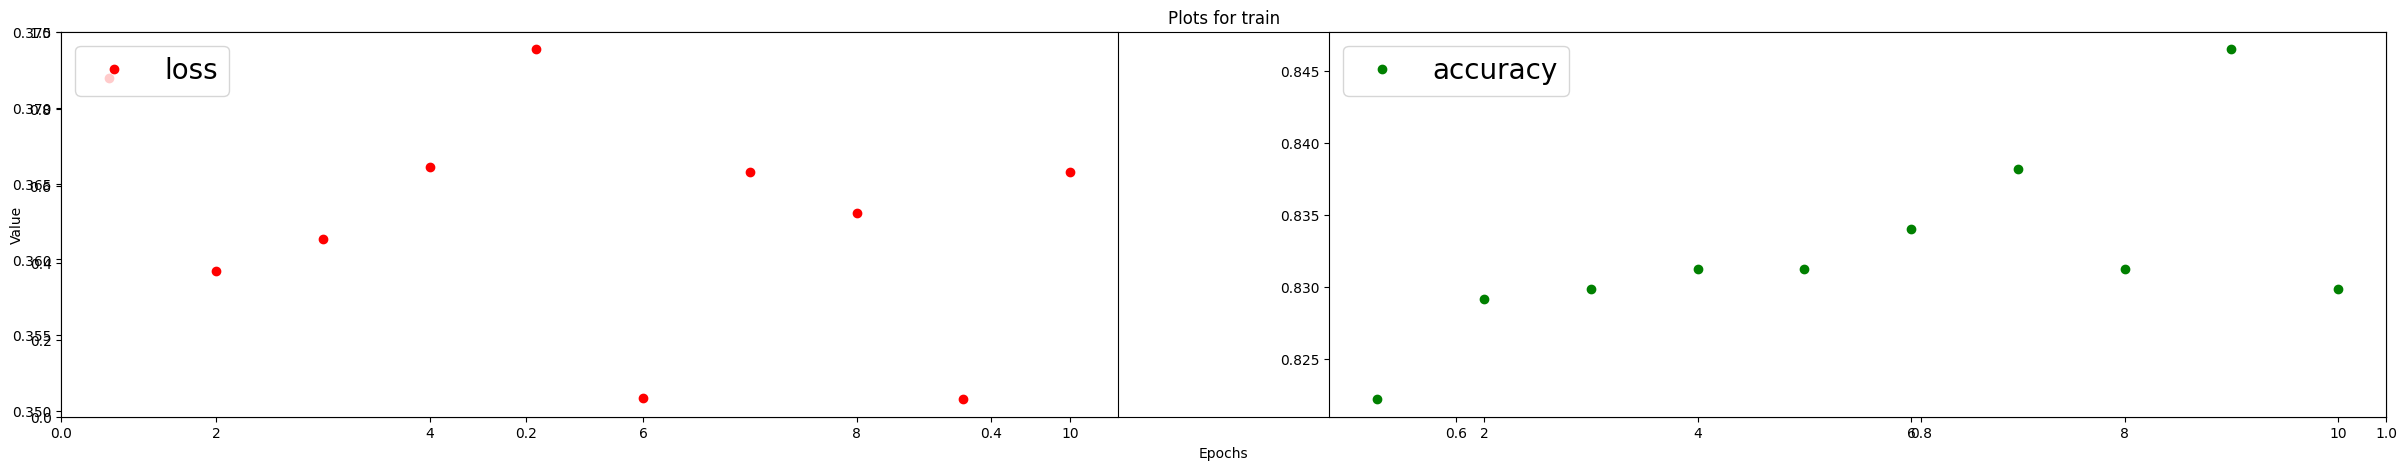

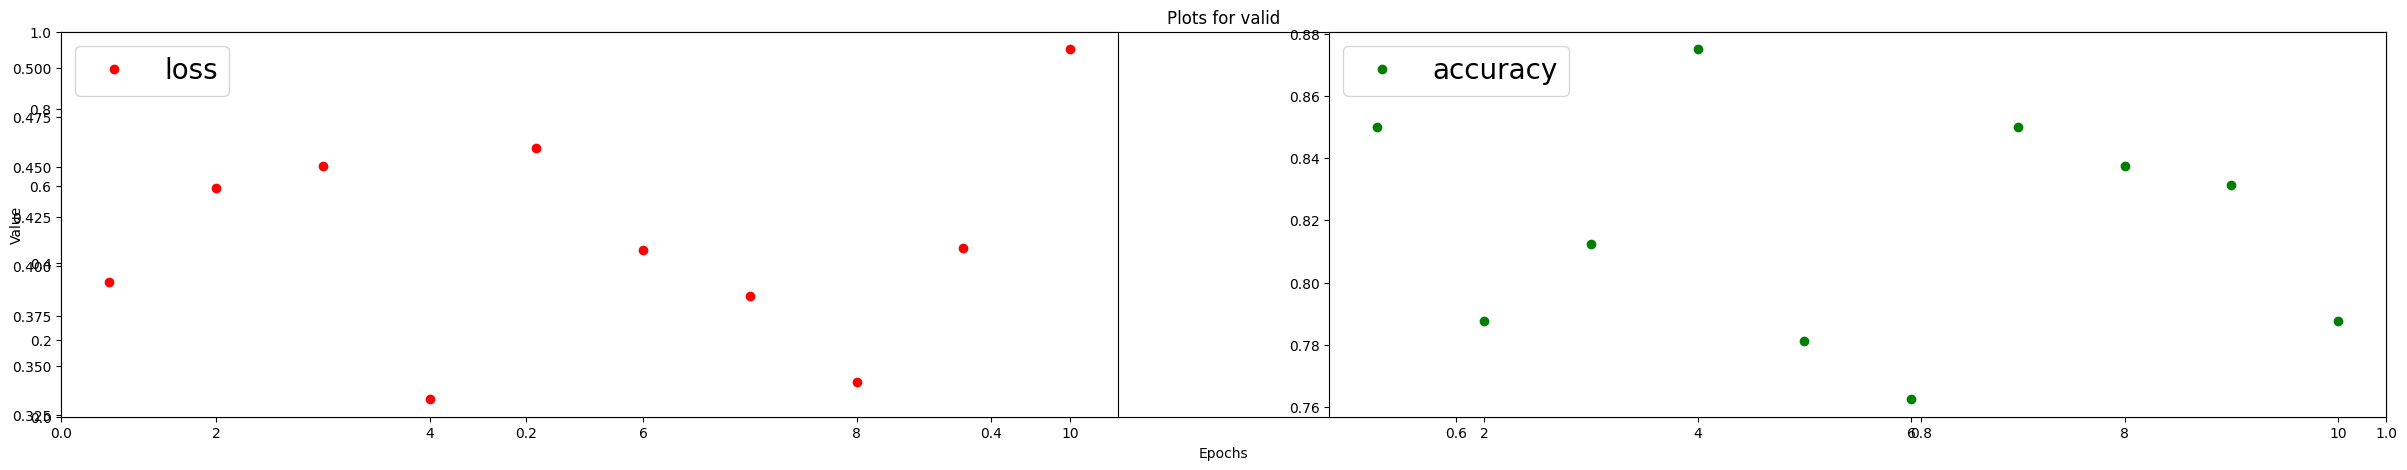

In [142]:
print('Learning rate: 0.0007, Batch size: 20')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=20, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=20, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=20, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 50
Epoch : 1, train accuracy : 0.8437930345535278, train loss : 0.34852010011672974
Epoch : 1, val_accuracy : 0.8450000286102295, val_loss : 0.5184484720230103
Epoch : 2, train accuracy : 0.8539655804634094, train loss : 0.3188934922218323
Epoch : 2, val_accuracy : 0.8199999928474426, val_loss : 0.40493854880332947
Epoch : 3, train accuracy : 0.8486206531524658, train loss : 0.33375027775764465
Epoch : 3, val_accuracy : 0.8149999976158142, val_loss : 0.43149134516716003
Epoch : 4, train accuracy : 0.8599998950958252, train loss : 0.3187636435031891
Epoch : 4, val_accuracy : 0.7950000166893005, val_loss : 0.45732855796813965
Epoch : 5, train accuracy : 0.848275899887085, train loss : 0.33608511090278625
Epoch : 5, val_accuracy : 0.8349999785423279, val_loss : 0.38947317004203796
Epoch : 6, train accuracy : 0.8415516018867493, train loss : 0.3288036584854126
Epoch : 6, val_accuracy : 0.8349999785423279, val_loss : 0.35390716791152954
Epoch : 7, train acc

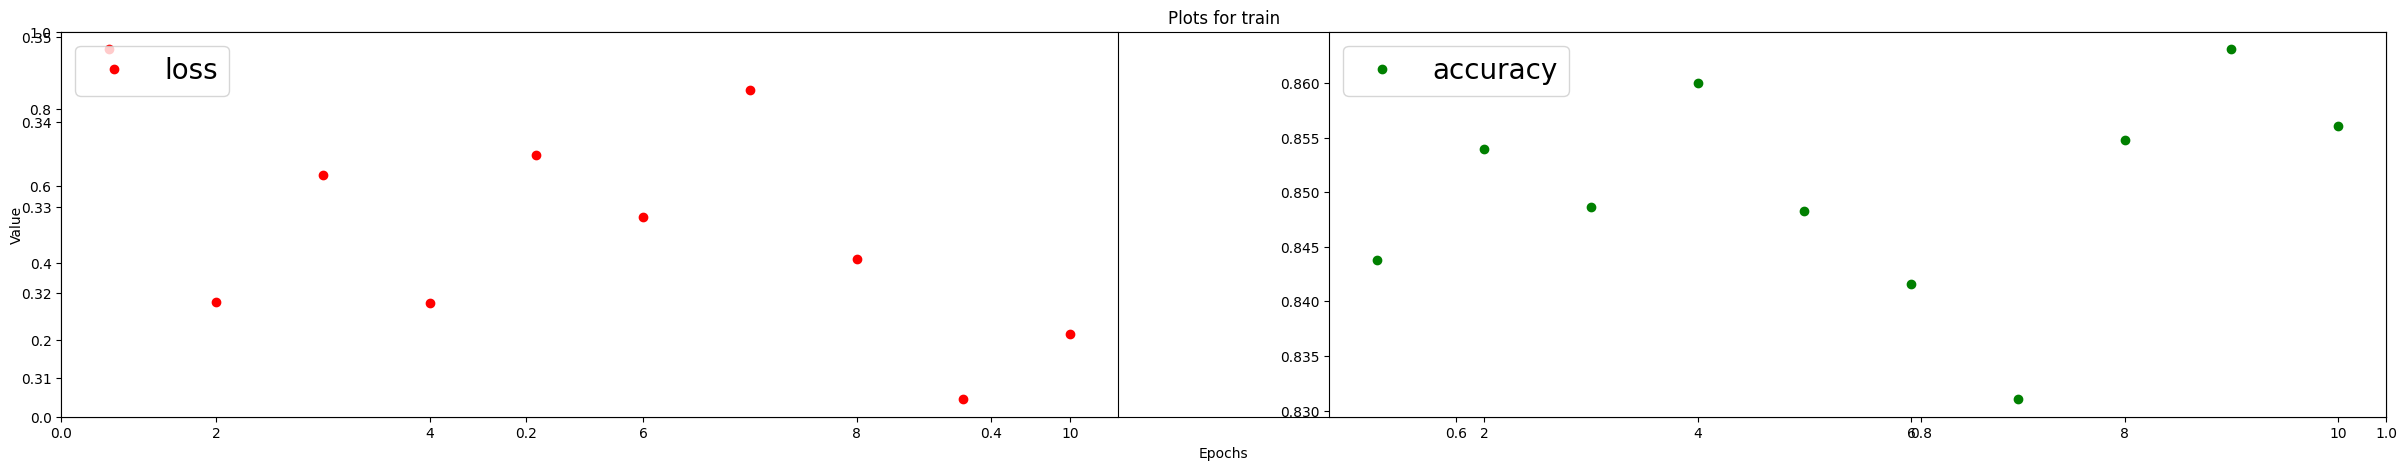

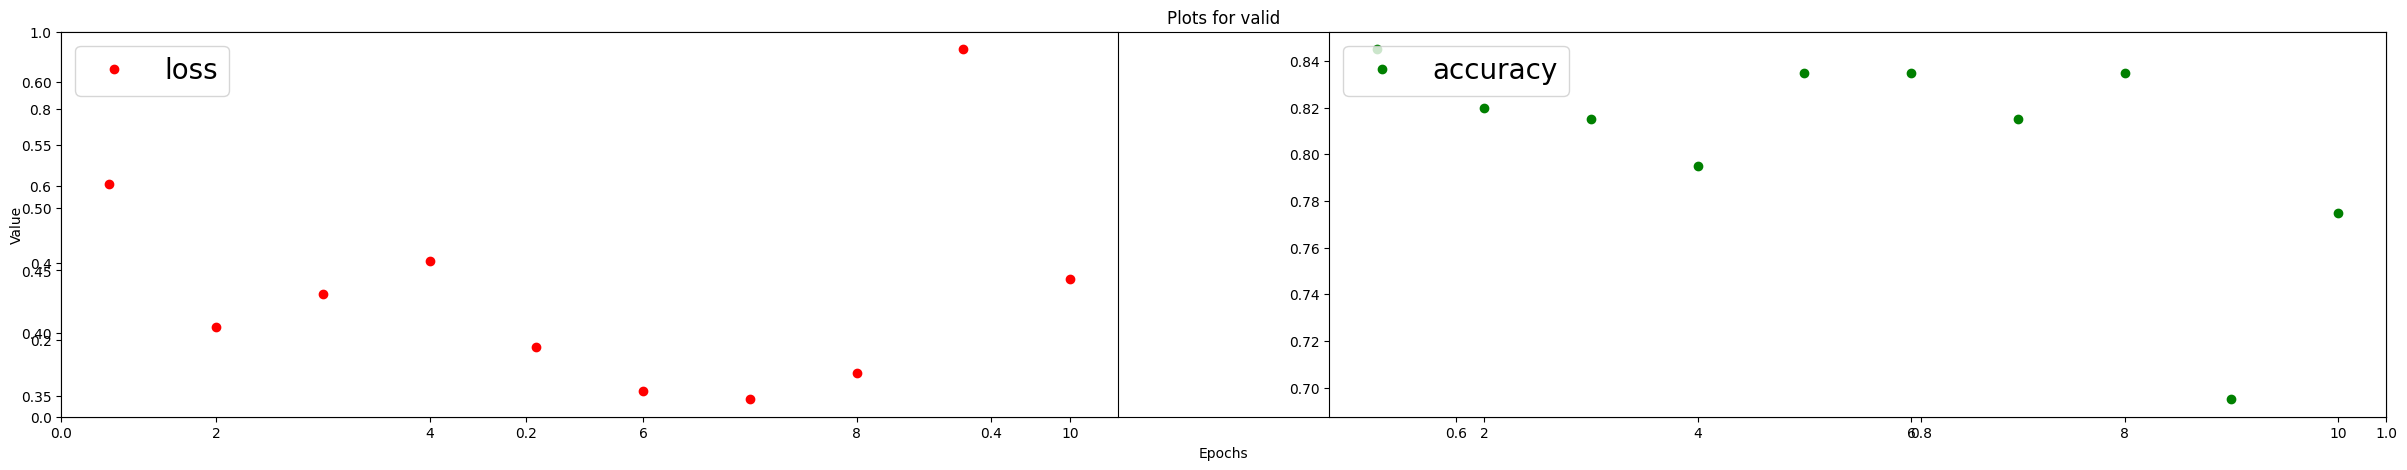

In [143]:
print('Learning rate: 0.001, Batch size: 50')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=50, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=50, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=50, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0005, Batch size: 50
Epoch : 1, train accuracy : 0.8618965744972229, train loss : 0.3156803250312805
Epoch : 1, val_accuracy : 0.7800000309944153, val_loss : 0.40109968185424805
Epoch : 2, train accuracy : 0.8710345029830933, train loss : 0.29513880610466003
Epoch : 2, val_accuracy : 0.7400000095367432, val_loss : 0.475181519985199
Epoch : 3, train accuracy : 0.8620690107345581, train loss : 0.3042123019695282
Epoch : 3, val_accuracy : 0.8049999475479126, val_loss : 0.3742287755012512
Epoch : 4, train accuracy : 0.8679310083389282, train loss : 0.29000046849250793
Epoch : 4, val_accuracy : 0.8199999928474426, val_loss : 0.4372844994068146
Epoch : 5, train accuracy : 0.8567240238189697, train loss : 0.3130050301551819
Epoch : 5, val_accuracy : 0.8600000143051147, val_loss : 0.31191369891166687
Epoch : 6, train accuracy : 0.8755171895027161, train loss : 0.2873382270336151
Epoch : 6, val_accuracy : 0.8500000238418579, val_loss : 0.36439114809036255
Epoch : 7, train accur

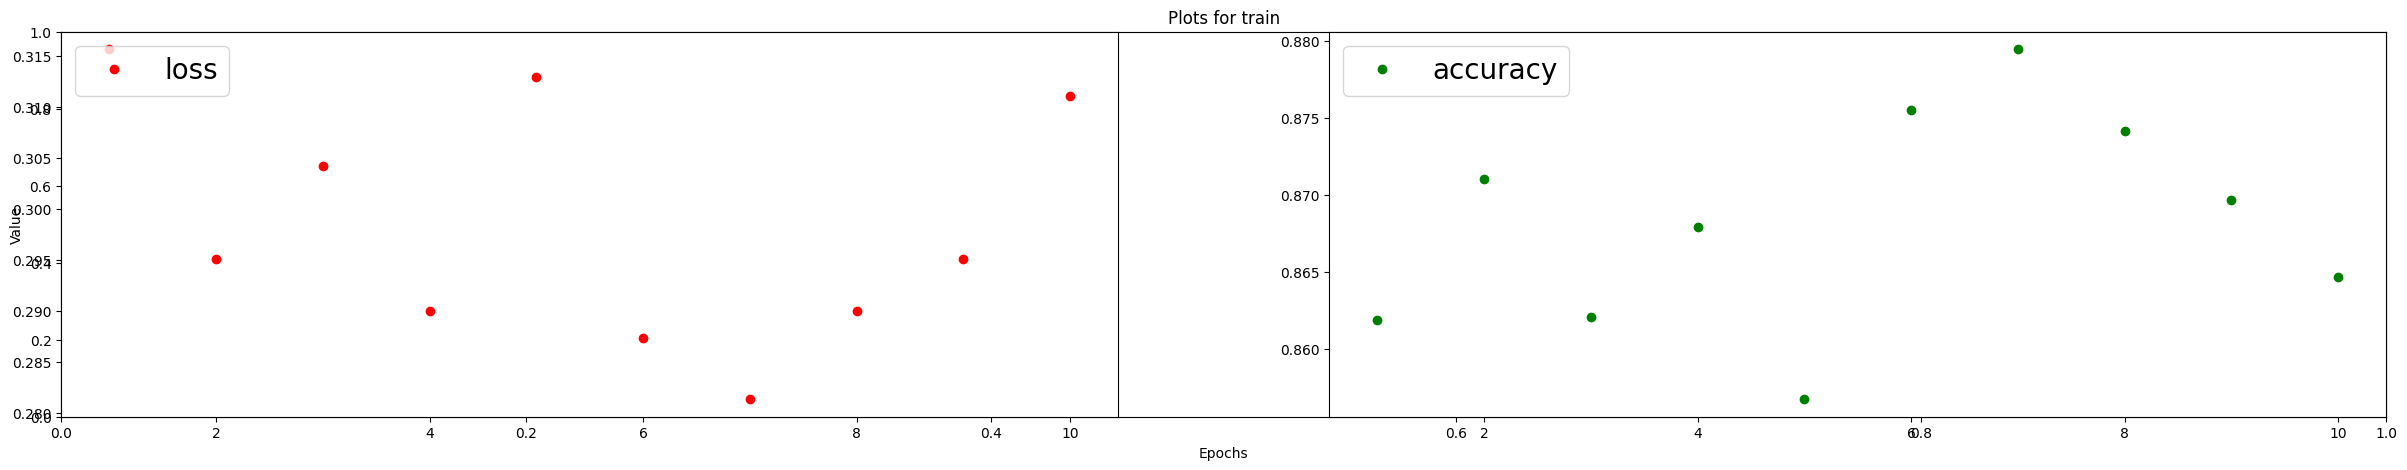

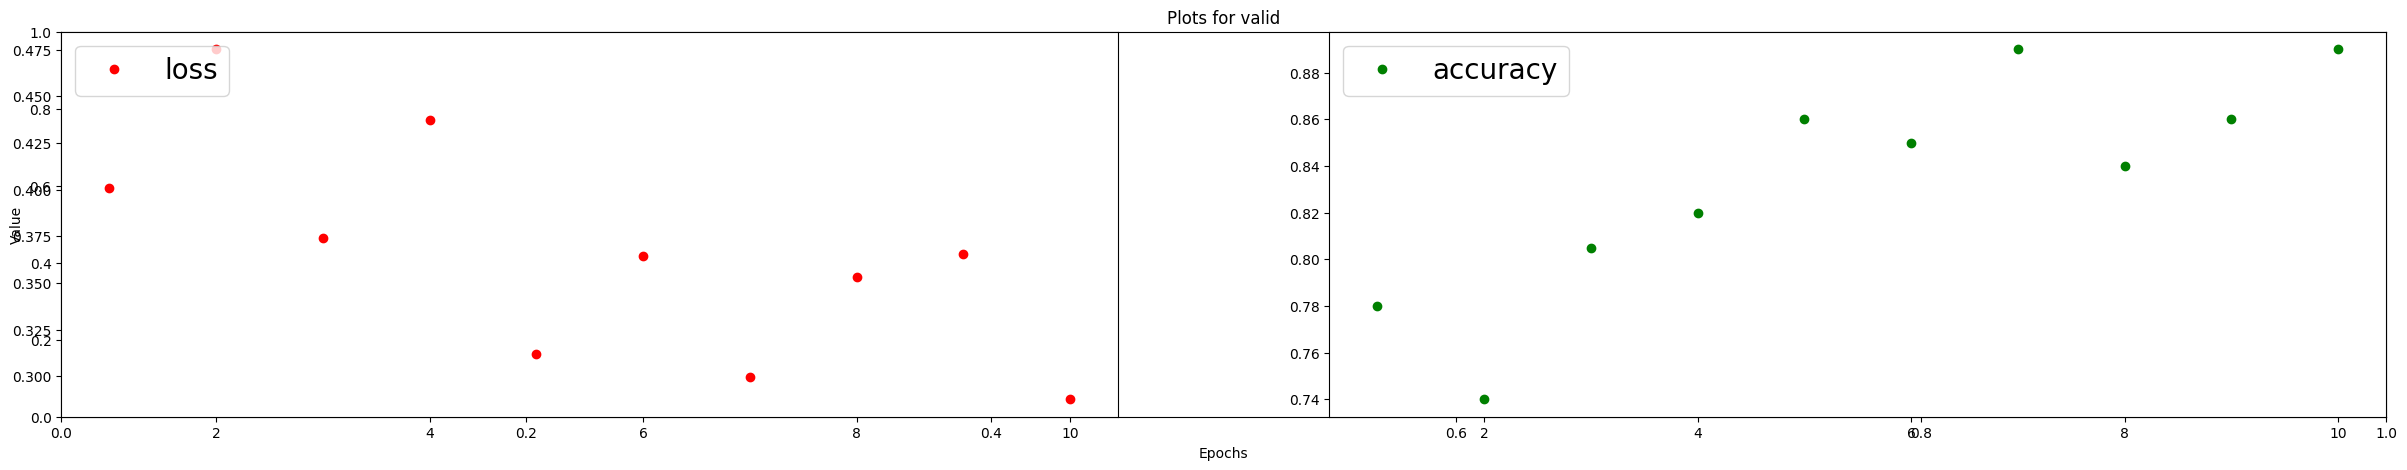

In [144]:
print('Learning rate: 0.0005, Batch size: 50')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=50, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=50, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=50, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0007, Batch size: 50
Epoch : 1, train accuracy : 0.8470689058303833, train loss : 0.32258087396621704
Epoch : 1, val_accuracy : 0.824999988079071, val_loss : 0.341235876083374
Epoch : 2, train accuracy : 0.867758572101593, train loss : 0.29502925276756287
Epoch : 2, val_accuracy : 0.7950000166893005, val_loss : 0.3965252637863159
Epoch : 3, train accuracy : 0.8824137449264526, train loss : 0.2849457859992981
Epoch : 3, val_accuracy : 0.8600000143051147, val_loss : 0.33377546072006226
Epoch : 4, train accuracy : 0.8836206793785095, train loss : 0.286274254322052
Epoch : 4, val_accuracy : 0.7699999809265137, val_loss : 0.42297297716140747
Epoch : 5, train accuracy : 0.8755171895027161, train loss : 0.2889808416366577
Epoch : 5, val_accuracy : 0.8700000047683716, val_loss : 0.3815780580043793
Epoch : 6, train accuracy : 0.869310200214386, train loss : 0.2936999201774597
Epoch : 6, val_accuracy : 0.875, val_loss : 0.30328094959259033
Epoch : 7, train accuracy : 0.878448188

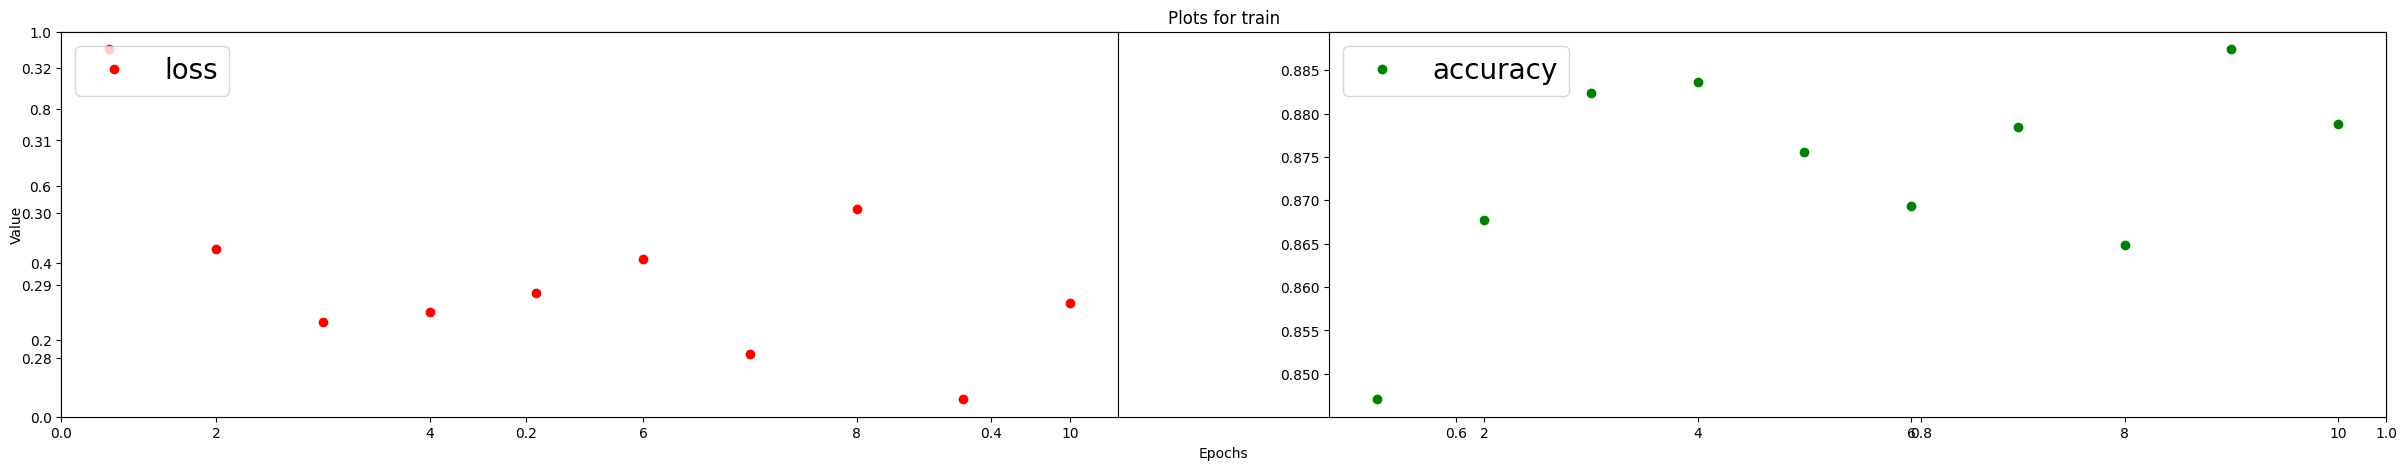

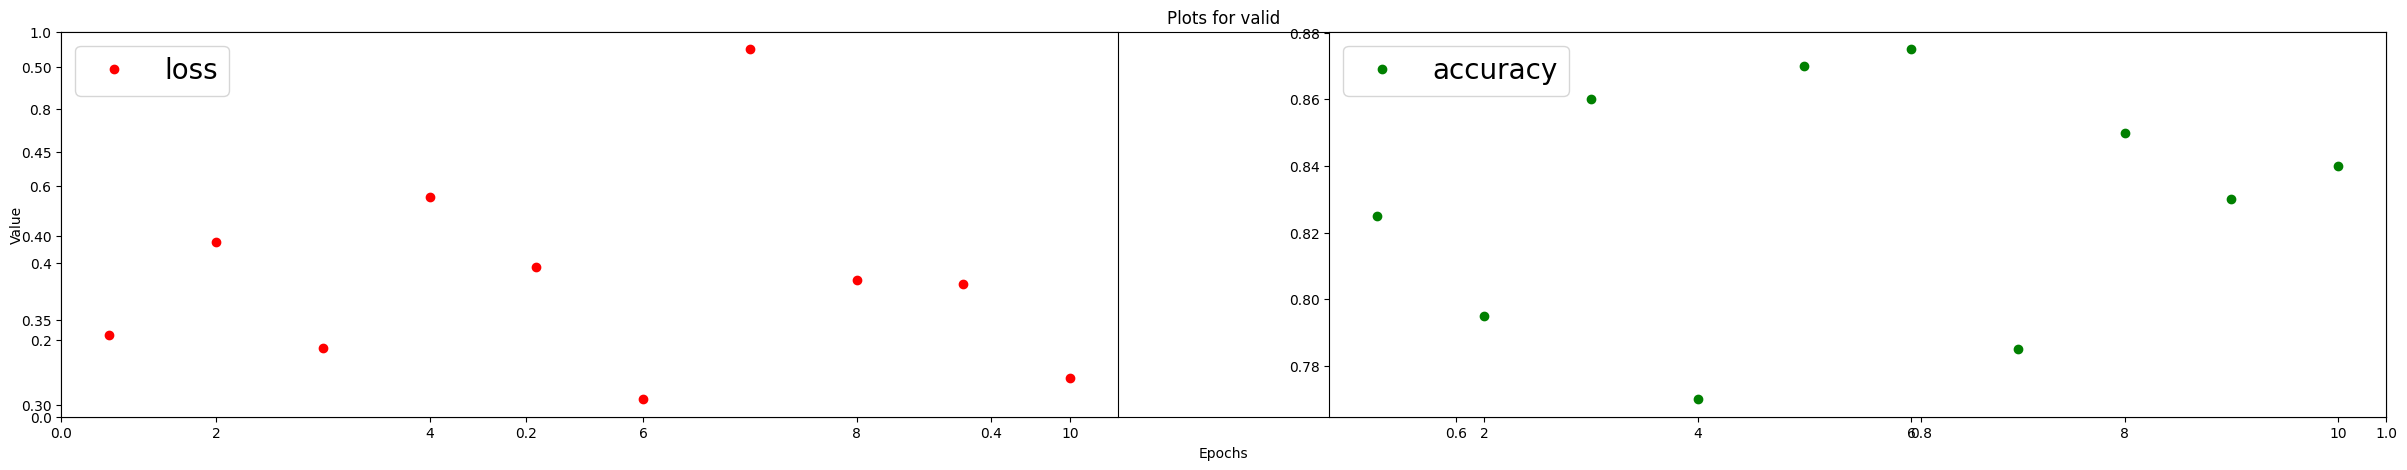

In [145]:
print('Learning rate: 0.0007, Batch size: 50')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=50, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=50, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=50, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Tasks 7-8.
The work of the model

In [260]:
dog_probs = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        preds = model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        dog_probs += list(zip(labels, preds_list))

dog_probs.sort(key = lambda x : int(x[0]))     
idx = list(map(lambda x: x[0],dog_probs))
prob = list(map(lambda x: x[1],dog_probs))

submission = pd.DataFrame({'id':idx,'label':prob})

submission

,id,label
0,800,0.733082
1,801,0.526302
2,802,0.628408
3,803,0.053554
4,804,0.118039
...,...,...
195,1895,0.053385
196,1896,0.853591
197,1897,0.875587
198,1898,0.893070


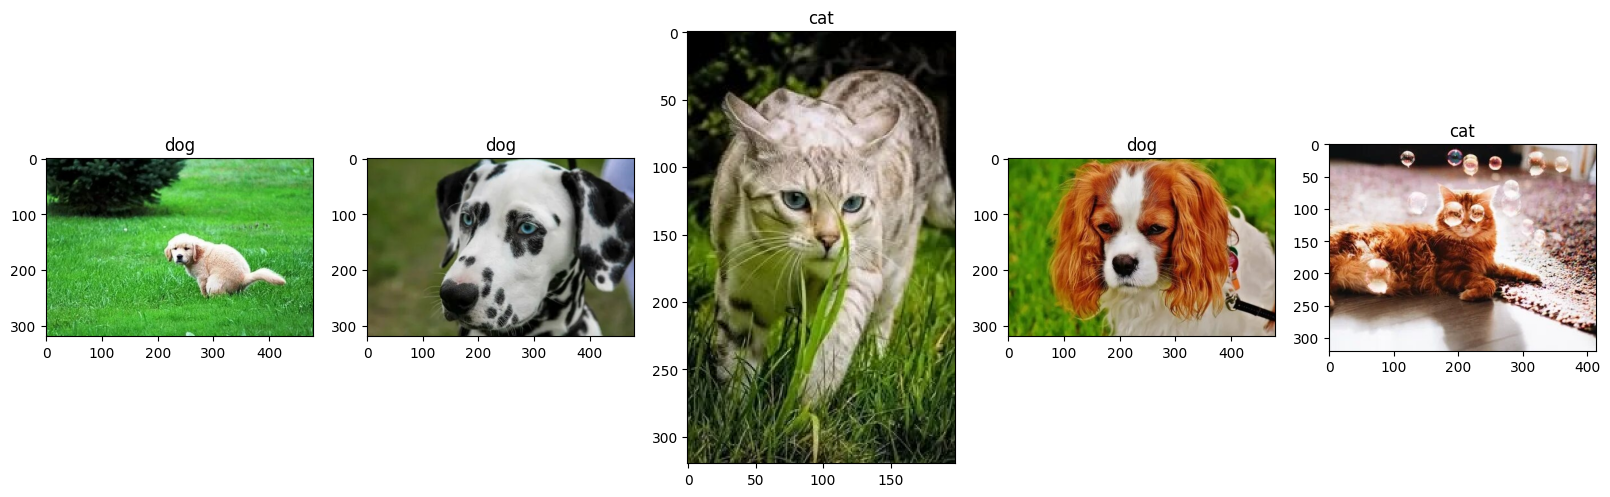

In [165]:
class_ = {0: 'cat', 1: 'dog'}

fig, axes = plt.subplots(1, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():
    
    i = random.choice(submission['id'].values)
    
    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0
        
    img_path = os.path.join(test_path, f'{i}.jpg')
    img = Image.open(img_path)
    
    ax.set_title(class_[label])
    ax.imshow(img)

Tasks 9-10

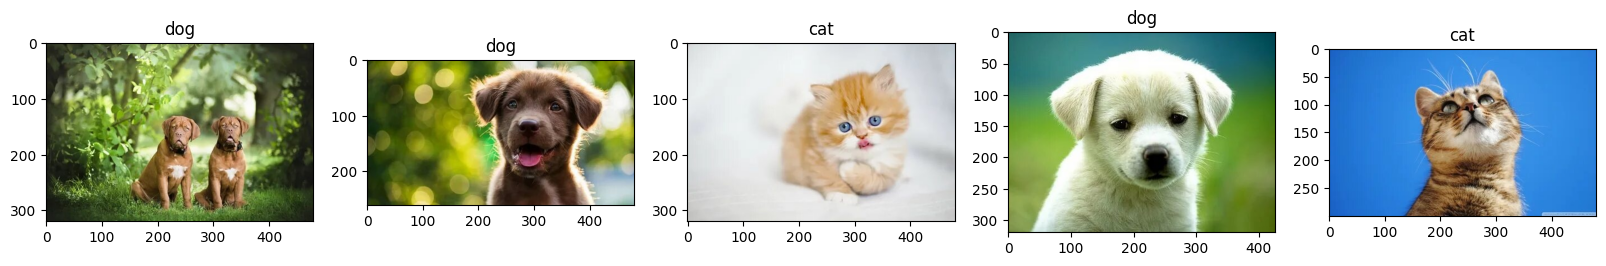

In [261]:
torch.save(model.state_dict(), 'ConvNetModel.pth')

loaded_model = ConvNet().to(device)
loaded_model.load_state_dict(torch.load('ConvNetModel.pth'))
loaded_model.eval()

cat_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        preds = loaded_model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        cat_probs += list(zip(labels, preds_list))
        
idx = list(map(lambda x: x[0],cat_probs))
prob = list(map(lambda x: x[1],cat_probs))

submission = pd.DataFrame({'id':idx,'label':prob})

class_ = {0: 'cat', 1: 'dog'}

fig, axes = plt.subplots(1, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():
    
    i = random.choice(submission['id'].values)
    
    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0
        
    img_path = os.path.join(test_path, f'{i}.jpg')
    img = Image.open(img_path)
    
    ax.set_title(class_[label])
    ax.imshow(img)